<a href="https://colab.research.google.com/github/Dana1402/NeuralNetworksScripts/blob/main/Conv_NN_Multy_flow_from_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
import tarfile
from tqdm import tqdm
import cv2
import pandas as pd

# Получаем данные

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = 'https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz'
output = '/content/drive/MyDrive/tmp/oxford-102-flowers.tar.gz'
gdown.download(url, output, quiet=False)
!mkdir -p 102flowers
!tar -xzf /content/drive/MyDrive/tmp/oxford-102-flowers.tar.gz -C /content/drive/MyDrive/tmp/

In [ ]:
names = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells",
    "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation",
    "garden phlox", "love in the mist", "mexican aster", "alpine sea holly",
    "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
    "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy", "primula", "sunflower",
    "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani",
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum",
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper",
    "blackberry lily"
]

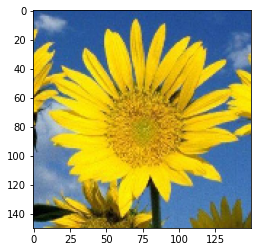

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/tmp/oxford-102-flowers/jpg/image_05446.jpg", target_size=(150, 150))
plt.imshow(img)

In [ ]:
imgs = []
lbls = []
with open('/content/drive/MyDrive/tmp/oxford-102-flowers/train.txt', 'r') as fl:
   for line in fl:
     img_name = line.split(' ')[0][4:]
     label = line.split(' ')[1].rstrip()
     imgs.append(img_name)
     lbls.append(label)

In [ ]:
data = {"img": imgs,
         "labels": lbls}

df_train = pd.DataFrame(data)
df_train.head()

,img,labels
0,image_03860.jpg,16
1,image_06092.jpg,13
2,image_02400.jpg,42
3,image_02852.jpg,55
4,image_07710.jpg,96


In [ ]:
imgs = []
lbls = []
with open('/content/drive/MyDrive/tmp/oxford-102-flowers/test.txt', 'r') as fl:
   for line in fl:
     img_name = line.split(' ')[0][4:]
     label = line.split(' ')[1].rstrip()
     imgs.append(img_name)
     lbls.append(label)

In [ ]:
data = {"img": imgs,
         "labels": lbls}

df_test = pd.DataFrame(data)
df_test.head()

,img,labels
0,image_06977.jpg,34
1,image_00800.jpg,80
2,image_05038.jpg,58
3,image_06759.jpg,0
4,image_01133.jpg,45


In [ ]:
imgs = []
lbls = []
with open('/content/drive/MyDrive/tmp/oxford-102-flowers/valid.txt', 'r') as fl:
   for line in fl:
     img_name = line.split(' ')[0][4:]
     label = line.split(' ')[1].rstrip()
     imgs.append(img_name)
     lbls.append(label)

In [ ]:
data = {"img": imgs,
         "labels": lbls}

df_valid = pd.DataFrame(data)
df_valid.head()

,img,labels
0,image_04467.jpg,89
1,image_07129.jpg,44
2,image_05166.jpg,4
3,image_07002.jpg,34
4,image_02007.jpg,79


In [ ]:
print(df_train.shape)
print(df_test.shape)
print(df_valid.shape)

(1020, 2)
(6149, 2)
(1020, 2)


# Создаем генератор

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
datagen_val = ImageDataGenerator(rescale = 1./255)
# test_datagen = ImageDataGenerator(preprocess_img) 

In [ ]:
train_generator = datagen.flow_from_dataframe(
                                dataframe=df_train,
                                directory = '/content/drive/MyDrive/tmp/oxford-102-flowers/jpg',                              
                                x_col='img',
                                y_col='labels',
                                target_size=(226, 226),
                                batch_size=20,
                                class_mode='categorical'  # expected one of: {None, 'sparse', 'categorical', 'binary', 'raw', 'multi_output', 'input'}                         
                                      )

validation_generator = datagen_val.flow_from_dataframe(
                                dataframe=df_valid,   
                                directory = '/content/drive/MyDrive/tmp/oxford-102-flowers/jpg',  
                                x_col='img',
                                y_col='labels',
                                target_size=(226, 226),
                                batch_size=20,
                                class_mode='categorical'
                                                                   )

Found 1020 validated image filenames belonging to 102 classes.
Found 1020 validated image filenames belonging to 102 classes.


# MODEL TRAINING

Загрузим модель VGG16, предобученную на imagenet

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(226,226, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(102, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 102)               26214     
                                                                 
Total params: 21,163,686
Trainable params: 6,448,998
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [ ]:
history = model.fit( train_generator,
                      steps_per_epoch=50,
                      epochs=30,
                      validation_data=validation_generator,
                      validation_steps=50,
                      verbose=2)

Epoch 1/30
50/50 - 1100s - loss: 6.1865 - acc: 0.0100 - val_loss: 4.6270 - val_acc: 0.0170 - 1100s/epoch - 22s/step
Epoch 2/30
50/50 - 1064s - loss: 4.5783 - acc: 0.0240 - val_loss: 4.5928 - val_acc: 0.0360 - 1064s/epoch - 21s/step
Epoch 3/30
50/50 - 1062s - loss: 4.4587 - acc: 0.0250 - val_loss: 4.3185 - val_acc: 0.0510 - 1062s/epoch - 21s/step
Epoch 4/30
50/50 - 1047s - loss: 4.3063 - acc: 0.0430 - val_loss: 4.2156 - val_acc: 0.0620 - 1047s/epoch - 21s/step
Epoch 5/30
50/50 - 1048s - loss: 4.1525 - acc: 0.0640 - val_loss: 4.0614 - val_acc: 0.0750 - 1048s/epoch - 21s/step
Epoch 6/30
50/50 - 1048s - loss: 3.9358 - acc: 0.0980 - val_loss: 3.8163 - val_acc: 0.1000 - 1048s/epoch - 21s/step
Epoch 7/30
50/50 - 1047s - loss: 3.6997 - acc: 0.1260 - val_loss: 3.5560 - val_acc: 0.1510 - 1047s/epoch - 21s/step
Epoch 8/30
50/50 - 1043s - loss: 3.4447 - acc: 0.1780 - val_loss: 3.2661 - val_acc: 0.1950 - 1043s/epoch - 21s/step
Epoch 9/30
50/50 - 1037s - loss: 3.1913 - acc: 0.1950 - val_loss: 3.1569

#Vizialization

In [ ]:
def visualize_loss(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']

  epochs = range(1, len(history_dict['accuracy']) + 1)

  plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
  plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')

  plt.plot(epochs, acc_values, 'bo', label = 'Training acc', c = 'red')
  plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc', c = 'red')

  plt.title('Training and validation loss/accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss,accuracy')
  plt.legend()

  plt.show()

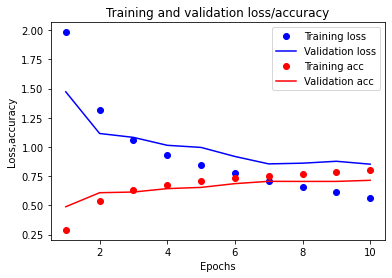

In [ ]:
visualize_loss(history)

In [ ]:
def show_cifar(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i].argmax()}")
            if labels[i] != predicted_labels[i].argmax():
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

313/313 [==============================] - 5s 15ms/step


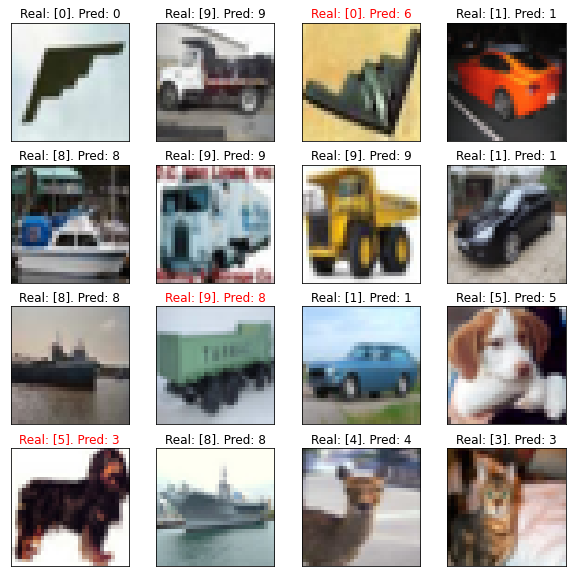

In [ ]:
predicted_labels = model.predict(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_cifar(x_test[idxs], y_test[idxs], predicted_labels[idxs])